# Classifying Twitter Hate: A Decision Tree Approach

In [65]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
# Convert each text to a vector and gives count of times of occurance
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.impute import SimpleImputer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix,roc_curve, auc, ConfusionMatrixDisplay
import seaborn as sns
import matplotlib.pyplot as plt


In [66]:
import re
import nltk 
from nltk.util import pr

stemmer = nltk.SnowballStemmer("english")
from nltk.corpus import stopwords
import string 
stopword = set(stopwords.words("english"))


## Dataset Preprocessing

In [67]:
# Importing dataset 
df = pd.read_csv("TD2.csv")
print(df.head)

<bound method NDFrame.head of        Unnamed: 0  count  hate_speech  offensive_language  neither  class   
0               0      3            0                   0        3      2  \
1               1      3            0                   3        0      1   
2               2      3            0                   3        0      1   
3               3      3            0                   2        1      1   
4               4      6            0                   6        0      1   
...           ...    ...          ...                 ...      ...    ...   
24778       25291      3            0                   2        1      1   
24779       25292      3            0                   1        2      2   
24780       25294      3            0                   3        0      1   
24781       25295      6            0                   6        0      1   
24782       25296      3            0                   0        3      2   

                                             

In [68]:
# Adding a new column label that maps each tweet to a specific class. The classes are
# 1.Hate Speech
# 2. Offensive language
# 3. No hate or offensive language
df['labels'] = df['class'].map({0:"Hate Speech Detected",1:"Offensive language detected",3:"No hate and offensive language detected"})
print(df.head)

<bound method NDFrame.head of        Unnamed: 0  count  hate_speech  offensive_language  neither  class   
0               0      3            0                   0        3      2  \
1               1      3            0                   3        0      1   
2               2      3            0                   3        0      1   
3               3      3            0                   2        1      1   
4               4      6            0                   6        0      1   
...           ...    ...          ...                 ...      ...    ...   
24778       25291      3            0                   2        1      1   
24779       25292      3            0                   1        2      2   
24780       25294      3            0                   3        0      1   
24781       25295      6            0                   6        0      1   
24782       25296      3            0                   0        3      2   

                                             

In [69]:
# Considering the 2 columns tweet and labels
df = df[['tweet','labels']]
df.fillna('No Hate or Offensive language detected', inplace=True)

print(df.tail())

                                                   tweet   
24778  you's a muthaf***in lie &#8220;@LifeAsKing: @2...  \
24779  you've gone and broke the wrong heart baby, an...   
24780  young buck wanna eat!!.. dat nigguh like I ain...   
24781              youu got wild bitches tellin you lies   
24782  ~~Ruffled | Ntac Eileen Dahlia - Beautiful col...   

                                       labels  
24778             Offensive language detected  
24779  No Hate or Offensive language detected  
24780             Offensive language detected  
24781             Offensive language detected  
24782  No Hate or Offensive language detected  


In [70]:
# Function clean to remove unnecessary special characters
def clean(text):
    text = str(text).lower()
    text = re.sub('\[.*?\]','',text)
    text = re.sub('https?://\S+|www\.\S+','',text)
    text = re.sub('<.*?>+','',text)
    text = re.sub('[%s]'% re.escape(string.punctuation),'',text)
    text = re.sub('\n','',text)
    text = re.sub('\w*\d\w*','',text)
    text = [word for word in text.split(' ') if word not in stopword]
    text = " ".join(text)
    text = [stemmer.stem(word) for word in text.split(' ')]
    text = " ".join(text)
    return text
df["tweet"] = df["tweet"].apply(clean)
print(df.head())

    

                                               tweet   
0   rt mayasolov woman shouldnt complain clean ho...  \
1   rt  boy dat coldtyga dwn bad cuffin dat hoe  ...   
2   rt urkindofbrand dawg rt  ever fuck bitch sta...   
3             rt cganderson vivabas look like tranni   
4   rt shenikarobert shit hear might true might f...   

                                   labels  
0  No Hate or Offensive language detected  
1             Offensive language detected  
2             Offensive language detected  
3             Offensive language detected  
4             Offensive language detected  


## Decision Tree

In [71]:
x = np.array(df["tweet"])
y = np.array(df["labels"])

cv = CountVectorizer()
x = cv.fit_transform(x)
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size = 0.33, random_state = 42)
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [72]:
disTr_predict = clf.predict(X_test)
disTr = accuracy_score(disTr_predict, y_test)
print("Test accuarcy: {:.2f}%".format(disTr*100))

Test accuarcy: 87.19%


In [115]:
test_data = "cancel that bitch like Nino"
dg = cv.transform([test_data]).toarray()
print(clf.predict(dg))

['Offensive language detected']


## Logistic Regression

In [74]:
vect = TfidfVectorizer(ngram_range=(1,3)).fit(df['tweet'])

In [75]:
# BUILDING THE MODEL-->LOGISTIC REGRESSION
X = df["tweet"]
Y = df["labels"]
X = vect.transform(X)

In [76]:
Xl_train,Xl_test,Yl_train,Yl_test = train_test_split(X, Y, test_size=0.2, random_state = 42)

In [77]:
logReg = LogisticRegression()
logReg.fit(Xl_train, Yl_train)

LogisticRegression()

In [78]:
logReg_predict = logReg.predict(Xl_test)
logReg_acc = accuracy_score(logReg_predict, Yl_test)
print("Test accuarcy: {:.2f}%".format(logReg_acc*100))

Test accuarcy: 85.56%


In [116]:
test_data = "cancel that bitch like Nino"
test_data= vect.transform([test_data])
# cvl = CountVectorizer(lowercase=True)
# test_data = cvl.fit_transform(test_data)
# dl = cvl.transform([test_data]).toarray()
print(logReg.predict(test_data))

['Offensive language detected']


## Comparison

In [80]:
dt_cm = confusion_matrix(y_test, disTr_predict)
lr_cm = confusion_matrix(Yl_test, logReg_predict)

#### decision tree heatmap

<Axes: >

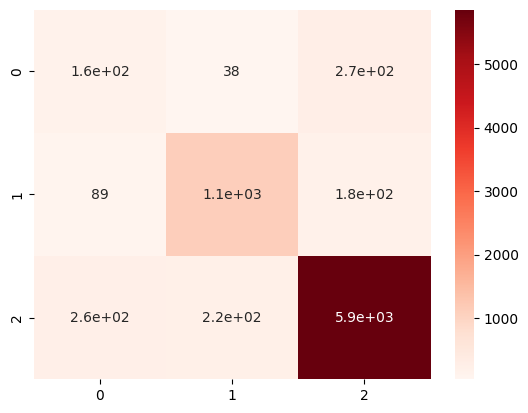

In [81]:
sns.heatmap(dt_cm, annot=True, cmap="Reds")

#### logistic regression tree

<Axes: >

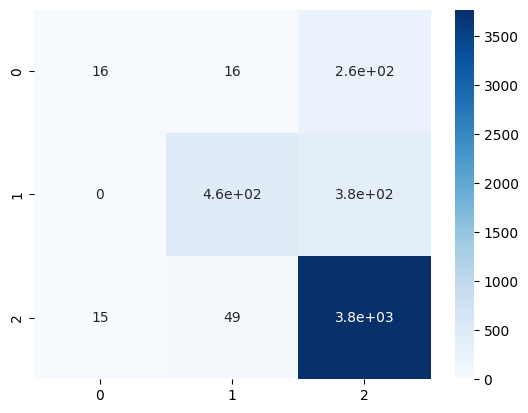

In [82]:
sns.heatmap(lr_cm, annot=True, cmap="Blues")

#### bar graph comparing accuracy of two models

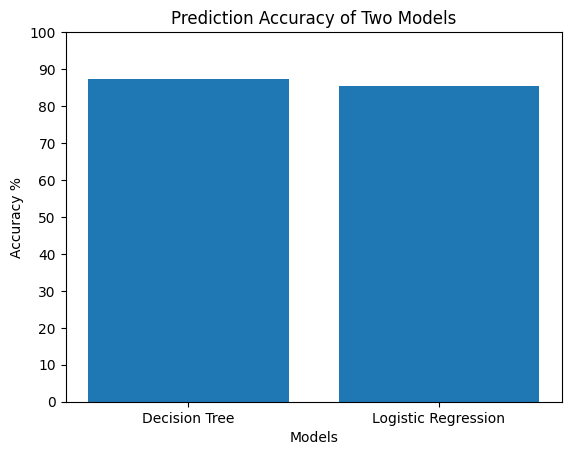

In [83]:
models = ['Decision Tree', 'Logistic Regression']
accuracies = [disTr*100, logReg_acc*100]
plt.bar(models, accuracies)
plt.title('Prediction Accuracy of Two Models')
plt.xlabel('Models')
plt.ylabel('Accuracy %')
plt.yticks(range(0, 101, 10))
plt.show()

#### Classification Report

In [88]:
# of Descission Tree
from sklearn.metrics import classification_report
print(classification_report(y_test, disTr_predict))

                                        precision    recall  f1-score   support

                  Hate Speech Detected       0.32      0.35      0.33       465
No Hate or Offensive language detected       0.81      0.81      0.81      1379
           Offensive language detected       0.93      0.92      0.93      6335

                              accuracy                           0.87      8179
                             macro avg       0.69      0.69      0.69      8179
                          weighted avg       0.87      0.87      0.87      8179



In [89]:
print(classification_report(Yl_test, logReg_predict))

                                        precision    recall  f1-score   support

                  Hate Speech Detected       0.52      0.06      0.10       290
No Hate or Offensive language detected       0.88      0.55      0.67       835
           Offensive language detected       0.86      0.98      0.92      3832

                              accuracy                           0.86      4957
                             macro avg       0.75      0.53      0.56      4957
                          weighted avg       0.84      0.86      0.83      4957

